In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess
import numpy as np
os.chdir("/home/jok120/sml/proj/attention-is-all-you-need-pytorch/")

# Analysis

In [2]:
from glob import glob
import seaborn as sns
sns.set(style="darkgrid")

In [7]:
result_files = sorted(glob("logs/0531-hp-2/*.train"))
result_files[0]

'logs/0531-hp-2/0531-q1-000.train'

In [6]:
dfs = [pd.read_csv(f) for f in result_files]
titles = [f[15:-6] for f in result_files]
dfes = []
for df in dfs:
    dfes.append(df[df["is_end_of_epoch"]].reset_index())

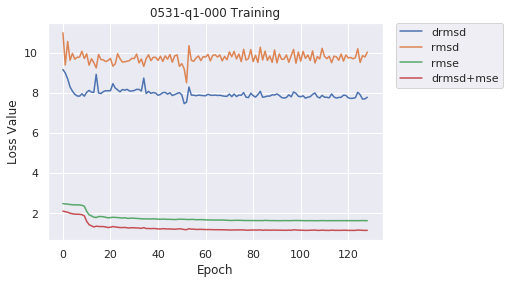

In [45]:
def do_plot(df, title):
    sns.lineplot(x=df.index, y="drmsd", data=df, label="drmsd")
    sns.lineplot(x=df.index, y="rmsd", data=df, label="rmsd")
    sns.lineplot(x=df.index, y="rmse", data=df, label="rmse")
    sns.lineplot(x=df.index, y="combined", data=df, label="drmsd+mse")
    plt.ylabel("Loss Value")
    plt.xlabel("Epoch")
    plt.legend(loc=(1.04,.7))
    plt.title("{} Training".format(title))
do_plot(dfes[0], titles[0])

In [11]:
mins = []
for df, title in zip(dfes, titles):
    row = df[df["combined"] == df["combined"].min()]
    row["title"] = title[:]
    mins.append(row)

/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
mins_df = pd.concat(mins)

In [13]:
mins_df.sort_values("combined", inplace=True)

In [14]:
mins_df

,index,drmsd,rmse,rmsd,combined,lr,is_val,is_end_of_epoch,time,title
110,887,6.227278,1.632549,8.750862,1.055509,0.000887,False,True,1.559327e+09,0531-q1-049
34,279,6.635559,1.666728,8.629090,1.109218,0.000129,False,True,1.559327e+09,0531-q1-051
72,583,7.189091,1.636616,9.174942,1.118946,0.000763,False,True,1.559328e+09,0531-q1-067
75,607,7.048793,1.655767,9.038059,1.125941,0.000281,False,True,1.559327e+09,0531-q1-027
85,687,7.421007,1.630114,9.473391,1.128131,0.000687,False,True,1.559326e+09,0531-q1-001
58,471,7.089592,1.655562,9.587233,1.128321,0.000471,False,True,1.559327e+09,0531-q1-025
120,967,7.693960,1.628716,9.831129,1.144051,0.003348,False,True,1.559327e+09,0531-q1-040
71,575,7.702584,1.628327,9.782750,1.144273,0.005635,False,True,1.559327e+09,0531-q1-032
35,287,7.649078,1.633075,9.881270,1.144801,0.000223,False,True,1.559326e+09,0531-q1-002
50,407,7.729141,1.628507,9.774333,1.146080,0.003259,False,True,1.559327e+09,0531-q1-057


In [46]:
names =  [int(t[-3:]) for t in mins_df["title"][:10]]
print(names)

[49, 51, 67, 27, 1, 25, 40, 32, 2, 57]


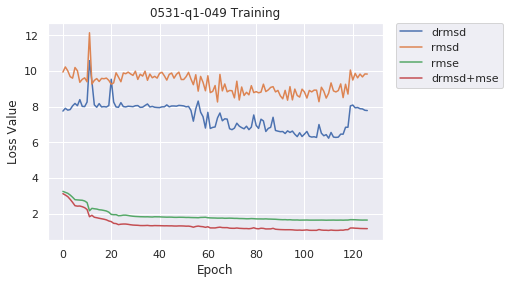

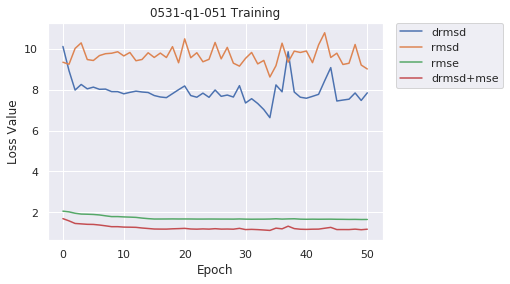

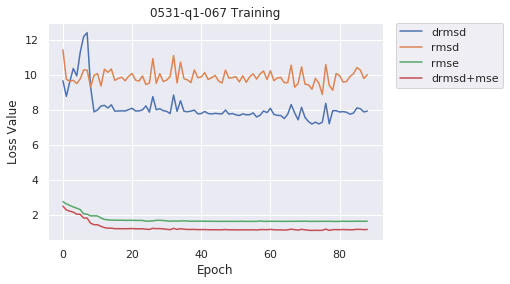

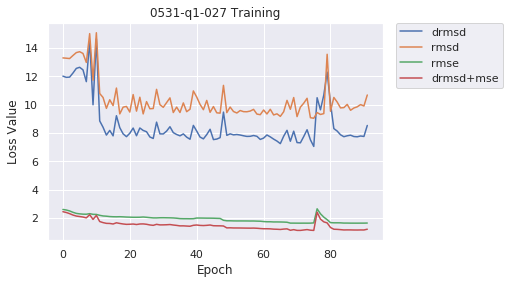

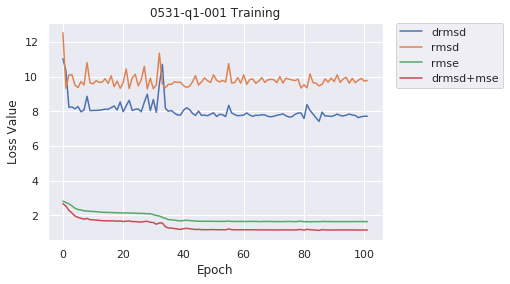

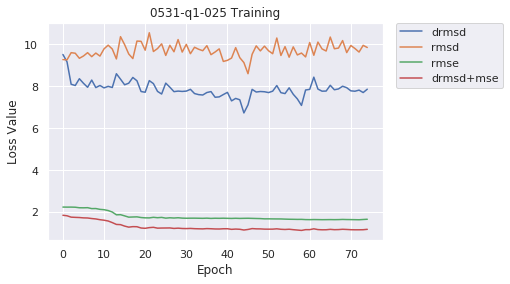

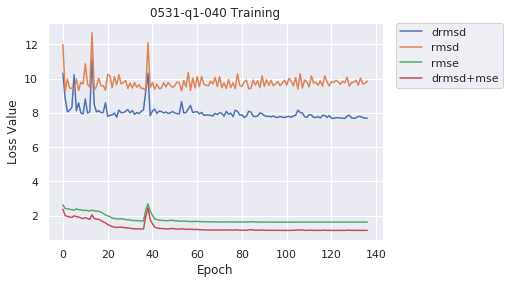

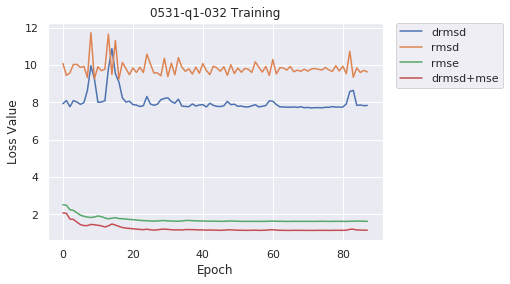

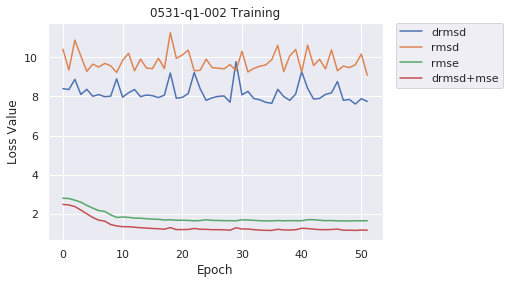

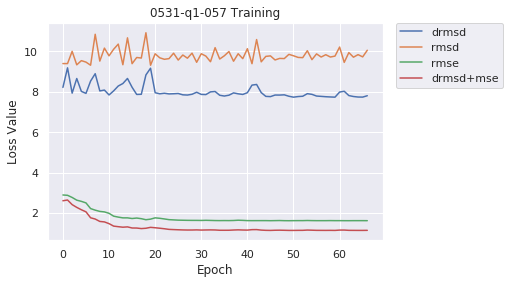

In [47]:
for n in names:
    do_plot(dfes[n], titles[n])
    plt.show()

In [17]:
train_logs =  [f"logs/{t}.log" for t in mins_df["title"][:10]]
train_logs

['logs/0531-q1-049.log',
 'logs/0531-q1-051.log',
 'logs/0531-q1-067.log',
 'logs/0531-q1-027.log',
 'logs/0531-q1-001.log',
 'logs/0531-q1-025.log',
 'logs/0531-q1-040.log',
 'logs/0531-q1-032.log',
 'logs/0531-q1-002.log',
 'logs/0531-q1-057.log']

In [20]:
import re
def get_arg(namespace, arg):
    pattern = f"{arg}=(.+?),"
    return re.search(pattern, namespace).group(1)

In [22]:
for row in mins:
    t = row["title"].item()
    with open(f"logs/0531-hp-2/{t}.log", "r") as f:
        args = f.readline()
    for a in ["d_model", "n_warmup_steps", "d_inner_hid"]:
        row[a] = get_arg(args, a)

/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
mins = pd.concat(mins)
mins.sort_values("combined", inplace=True)

In [24]:
mins

,index,drmsd,rmse,rmsd,combined,lr,is_val,is_end_of_epoch,time,title,d_model,n_warmup_steps,d_inner_hid
110,887,6.227278,1.632549,8.750862,1.055509,0.000887,False,True,1.559327e+09,0531-q1-049,12,4000,512
34,279,6.635559,1.666728,8.629090,1.109218,0.000129,False,True,1.559327e+09,0531-q1-051,56,4000,512
72,583,7.189091,1.636616,9.174942,1.118946,0.000763,False,True,1.559328e+09,0531-q1-067,56,2000,512
75,607,7.048793,1.655767,9.038059,1.125941,0.000281,False,True,1.559327e+09,0531-q1-027,56,4000,1024
85,687,7.421007,1.630114,9.473391,1.128131,0.000687,False,True,1.559326e+09,0531-q1-001,12,4000,2048
58,471,7.089592,1.655562,9.587233,1.128321,0.000471,False,True,1.559327e+09,0531-q1-025,12,4000,1024
120,967,7.693960,1.628716,9.831129,1.144051,0.003348,False,True,1.559327e+09,0531-q1-040,8,2000,1024
71,575,7.702584,1.628327,9.782750,1.144273,0.005635,False,True,1.559327e+09,0531-q1-032,8,1000,1024
35,287,7.649078,1.633075,9.881270,1.144801,0.000223,False,True,1.559326e+09,0531-q1-002,20,4000,2048
50,407,7.729141,1.628507,9.774333,1.146080,0.003259,False,True,1.559327e+09,0531-q1-057,12,1000,512


In [40]:
sorted(list(map(int,set(mins["d_model"]))))

[8, 12, 20, 56, 128, 512, 1024, 2048]

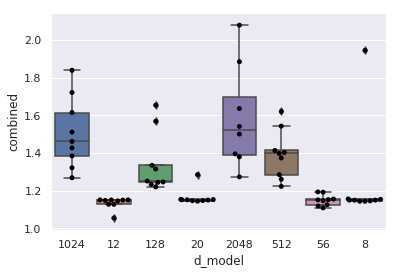

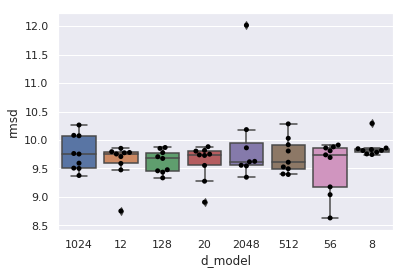

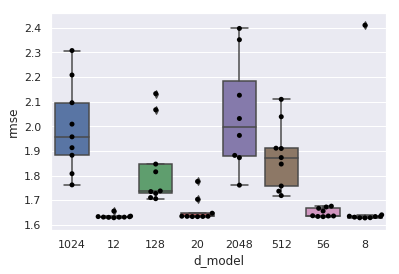

In [43]:
def do_loss_plots_on_var(d, var):
    sns.boxplot(x=var, y="combined", data=d)
    sns.swarmplot(x=var, y="combined", data=d, color="black")
    plt.figure()
    sns.boxplot(x=var, y="rmsd", data=d)
    sns.swarmplot(x=var, y="rmsd", data=d, color="black")
    plt.figure()
    sns.boxplot(x=var, y="rmse", data=d)
    sns.swarmplot(x=var, y="rmse", data=d, color="black")

do_loss_plots_on_var(mins, "d_model")

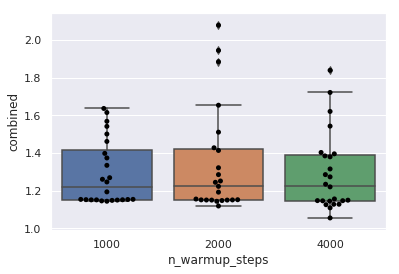

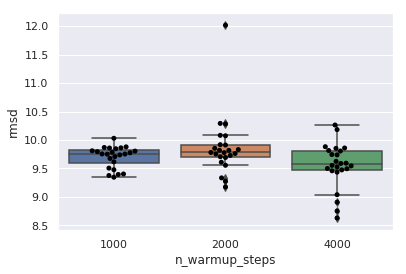

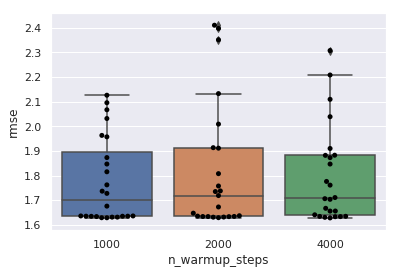

In [26]:
do_loss_plots_on_var(mins, "n_warmup_steps")

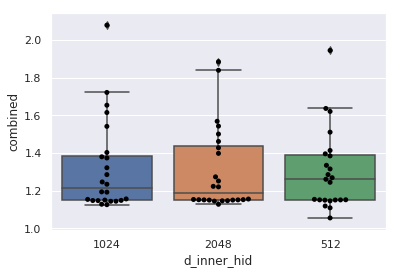

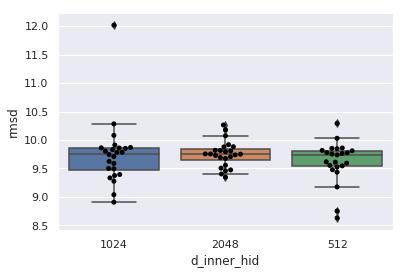

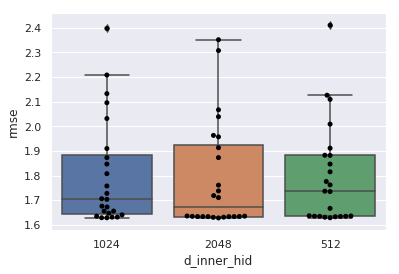

In [27]:
do_loss_plots_on_var(mins, "d_inner_hid")

In [28]:
summary = mins[["title", "combined", "drmsd", "rmsd", "rmse", "d_model", "n_warmup_steps", "d_inner_hid"]]

In [44]:
" ".join(summary["title"][-1:].to_list())

'0531-q1-047'

In [30]:
summary

,title,combined,drmsd,rmsd,rmse,d_model,n_warmup_steps,d_inner_hid
110,0531-q1-049,1.055509,6.227278,8.750862,1.632549,12,4000,512
34,0531-q1-051,1.109218,6.635559,8.629090,1.666728,56,4000,512
72,0531-q1-067,1.118946,7.189091,9.174942,1.636616,56,2000,512
75,0531-q1-027,1.125941,7.048793,9.038059,1.655767,56,4000,1024
85,0531-q1-001,1.128131,7.421007,9.473391,1.630114,12,4000,2048
58,0531-q1-025,1.128321,7.089592,9.587233,1.655562,12,4000,1024
120,0531-q1-040,1.144051,7.693960,9.831129,1.628716,8,2000,1024
71,0531-q1-032,1.144273,7.702584,9.782750,1.628327,8,1000,1024
35,0531-q1-002,1.144801,7.649078,9.881270,1.633075,20,4000,2048
50,0531-q1-057,1.146080,7.729141,9.774333,1.628507,12,1000,512
